In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas_datareader as pdr
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras.layers import Dropout
import math 
from datetime import date


plt.style.use('fivethirtyeight')

In [2]:
today = date.today()
df= pdr.DataReader('^BSESN', data_source='yahoo', start= '2006-01-01', end = today) 
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-02,9457.089844,9366.089844,9422.490234,9390.139648,14000.0,9390.139648
2006-01-03,9546.780273,9390.790039,9401.830078,9539.370117,13200.0,9539.370117
2006-01-04,9664.940430,9523.290039,9523.290039,9648.080078,21400.0,9648.080078
2006-01-05,9679.719727,9571.309570,9638.269531,9617.740234,19200.0,9617.740234
2006-01-06,9680.919922,9535.660156,9635.089844,9640.290039,16000.0,9640.290039
...,...,...,...,...,...,...
2021-04-16,49089.550781,48694.488281,48935.738281,48832.031250,11900.0,48832.031250
2021-04-19,48020.789062,47362.710938,47940.808594,47949.421875,10500.0,47949.421875
2021-04-20,48478.339844,47438.500000,48473.039062,47705.800781,11600.0,47705.800781


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-16,49089.550781,48694.488281,48935.738281,48832.031250,11900.0,48832.031250
2021-04-19,48020.789062,47362.710938,47940.808594,47949.421875,10500.0,47949.421875
2021-04-20,48478.339844,47438.500000,48473.039062,47705.800781,11600.0,47705.800781
2021-04-22,48143.160156,47204.500000,47501.710938,48080.671875,15800.0,48080.671875
2021-04-23,48265.390625,47669.550781,47863.808594,47878.449219,11200.0,47878.449219


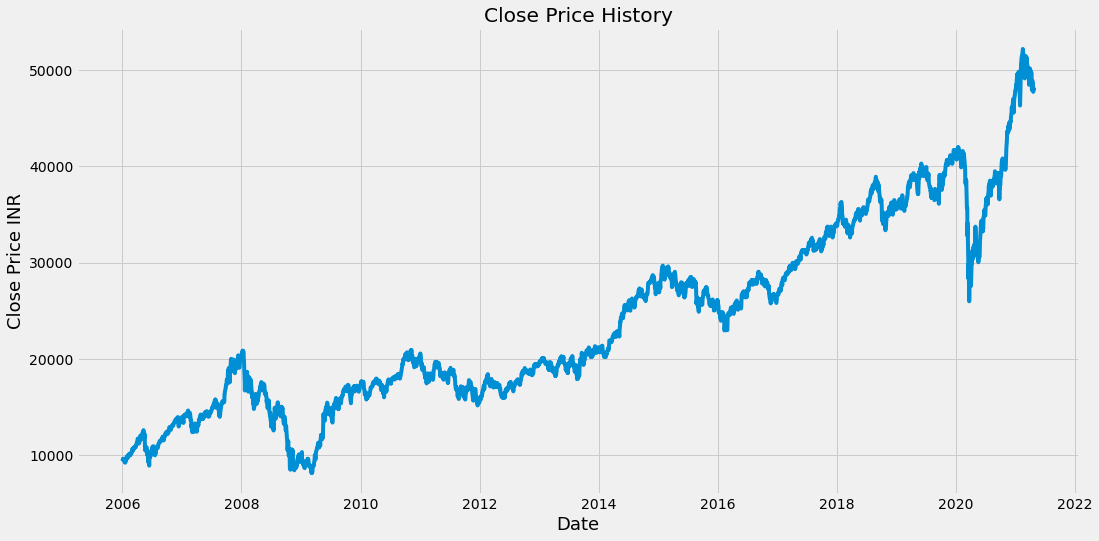

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
df1 = data.values

data_len = math.ceil(len(df1)*0.8)
data_len

3000

In [6]:
df1=df.reset_index()['Close']
df1

0        9390.139648
1        9539.370117
2        9648.080078
3        9617.740234
4        9640.290039
            ...     
3745    48832.031250
3746    47949.421875
3747    47705.800781
3748    48080.671875
3749    47878.449219
Name: Close, Length: 3750, dtype: float64

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.02795261]
 [0.0313447 ]
 [0.03381573]
 ...
 [0.89888722]
 [0.90740823]
 [0.90281161]]


In [14]:
train_data = df1[0: data_len , :]
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i , 0])
    y_train.append(train_data[i, 0])
    if i<= 101:
        print(x_train)
        print()
        print(y_train)
        print()

[array([0.02795261, 0.0313447 , 0.03381573, 0.03312609, 0.03363866,
       0.03234666, 0.02920643, 0.02774214, 0.02759008, 0.02615806,
       0.02622487, 0.02448373, 0.02930963, 0.03092623, 0.02965196,
       0.0315845 , 0.03467177, 0.03887804, 0.03838343, 0.0399941 ,
       0.03861596, 0.03826614, 0.03596377, 0.04136999, 0.04368533,
       0.04283384, 0.04433745, 0.04575311, 0.04378419, 0.04438769,
       0.04464045, 0.04138568, 0.04361758, 0.04563629, 0.04691397,
       0.04736243, 0.04637843, 0.0482271 , 0.0502308 , 0.05466847,
       0.05606209, 0.05534947, 0.05853017, 0.0583099 , 0.05338147,
       0.05485191, 0.05920754, 0.06008379, 0.06003855, 0.06178927,
       0.0613642 , 0.06320697, 0.06239072, 0.06093936, 0.06092209,
       0.06341585, 0.06634172, 0.06650108, 0.06871617, 0.07152474,
       0.0709092 , 0.07737376, 0.07904785, 0.08152299, 0.07794385,
       0.07960566, 0.0726315 , 0.06993794, 0.07681276, 0.08322028,
       0.08491166, 0.08817506, 0.08796481, 0.08534944, 0.0792

In [9]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2900, 100, 1)

In [11]:
#initialisizng the model 
model= Sequential()


model.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True,input_shape=(x_train.shape[1],1)))



model.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))



model.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=False))




model.add(Dense(units=25))


model.add(Dense(units=1))

#Compiling the network
model.compile(optimizer='adam',loss='mean_squared_error')


In [12]:
model.fit(x_train,y_train,epochs=25,batch_size=40)

Epoch 1/25
73/73 [==============================] - 4s 53ms/step - loss: 0.0060
Epoch 2/25
73/73 [==============================] - 4s 54ms/step - loss: 2.6109e-04
Epoch 3/25
73/73 [==============================] - 4s 54ms/step - loss: 2.5557e-04
Epoch 4/25
73/73 [==============================] - 4s 55ms/step - loss: 2.4463e-04
Epoch 5/25
73/73 [==============================] - 4s 55ms/step - loss: 2.4978e-04
Epoch 6/25
73/73 [==============================] - 4s 56ms/step - loss: 2.4000e-04
Epoch 7/25
73/73 [==============================] - 4s 56ms/step - loss: 2.2623e-04
Epoch 8/25
73/73 [==============================] - 4s 56ms/step - loss: 2.3118e-04
Epoch 9/25
73/73 [==============================] - 4s 55ms/step - loss: 2.1210e-04
Epoch 10/25
73/73 [==============================] - 4s 59ms/step - loss: 2.0639e-04
Epoch 11/25
73/73 [==============================] - 5s 65ms/step - loss: 1.9128e-04
Epoch 12/25
73/73 [==============================] - 5s 67ms/step - loss: 1.89

In [15]:
test_data = df1[data_len -100: , :]

x_test = []
y_test = df1[data_len: , :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])

In [16]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [17]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [18]:
rmse = np.sqrt(((prediction - y_test) ** 2).mean())
rmse

38408.67113828394

<ipython-input-19-b64332ded666>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']= prediction


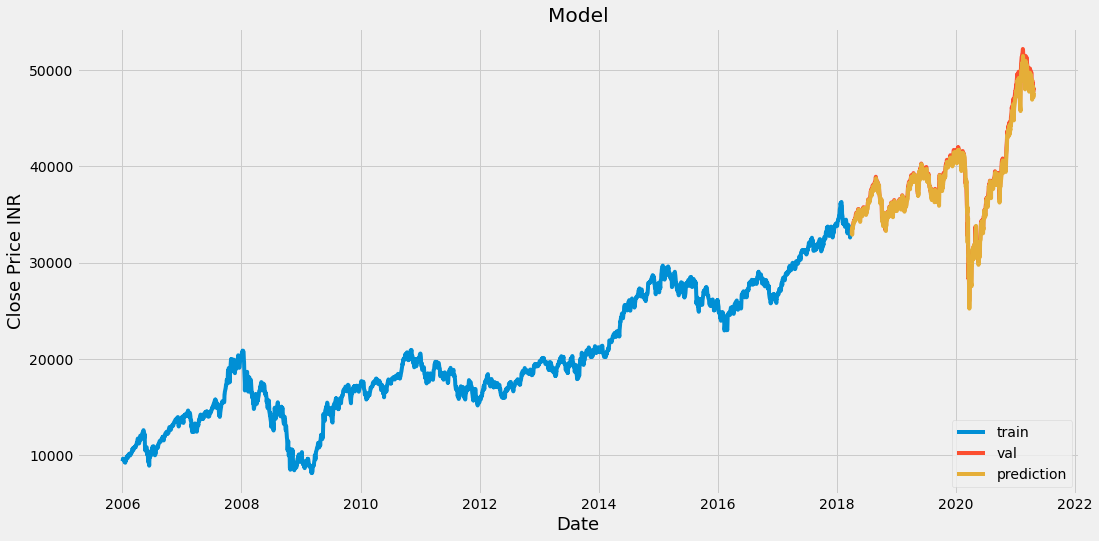

In [19]:
### Plotting 
train = data[:data_len]
valid = data[data_len:]
valid['prediction']= prediction

##visualizing
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['train','val','prediction'], loc= 'lower right')
plt.show()

In [19]:
valid

NameError: name 'valid' is not defined